In [1]:
from cmdstanpy import CmdStanModel, from_csv

#import cmdstanpy as cmdstanpy

import arviz as az
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from ipywidgets import FloatProgress
from IPython.display import display
from tqdm import tqdm_notebook
import pickle

from tensorflow_probability.substrates import numpy as tfp
tfd = tfp.distributions

In [2]:
# Dataset import

df = pd.read_csv("Py_Dataset.csv")
df.head()

,Unnamed: 0,Date,Y_log,Rural,Time,NS,quota,Provincia,Zonizzazione,Tipo,id
0,1,2018-01-01,3.688645,1,0,BADIA,0.522332,PR,Pianura Ovest,Fondo,1
1,2,2018-01-02,2.743930,1,1,BADIA,0.522332,PR,Pianura Ovest,Fondo,1
2,3,2018-01-03,2.687557,1,2,BADIA,0.522332,PR,Pianura Ovest,Fondo,1
3,4,2018-01-04,2.850192,1,3,BADIA,0.522332,PR,Pianura Ovest,Fondo,1
4,5,2018-01-05,3.558992,1,4,BADIA,0.522332,PR,Pianura Ovest,Fondo,1


In [3]:
staz = pd.read_csv("Stazioni_Emilia.csv")
staz.head()

,NomeStazione,Lat,Long,Regione,Quota,Provincia,AreaStazione,TipoStazione,id
0,BADIA,44.658309,10.285714,Emilia-Romagna,202.0,PR,Rurale,Fondo,1
1,BESENZONE,44.987113,9.955758,Emilia-Romagna,50.0,PC,Rurale,Fondo,2
2,BOGOLESE,44.835555,10.397238,Emilia-Romagna,35.0,PR,Suburbano,Industriale,3
3,CAORLE,44.418868,12.224176,Emilia-Romagna,4.0,RA,Urbano,Fondo,4
4,CASTELLARANO,44.532199,10.706261,Emilia-Romagna,150.0,RE,Suburbano,Fondo,5


2.3056598969634683

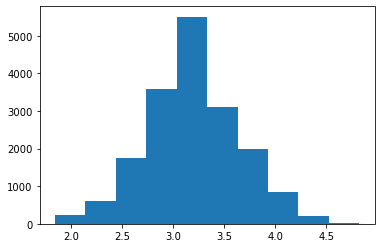

In [4]:
plt.hist(df.Y_log)
np.std(df.Y_log)*5 # a = 2, b = 3 per invgamma

In [5]:
# dummies

dummies = pd.get_dummies(df.Tipo)
dummies.head()

,Fondo,Industriale,Traffico
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [6]:
#model
y = np.array(df.Y_log)
x = np.matrix( pd.concat([df.quota, dummies.Fondo, dummies.Industriale], axis=1) )
t = np.array(df.Time)
r = np.array(df.Rural)
stazione = np.array(df.id)
omega = 2*np.pi/365
coord = np.matrix( pd.concat([staz.Lat, staz.Long], axis=1) )

N = len(y)
p = 3   # Quota + Tipo(2 dummies)
k = 4   # 4 basi di fourier + const
G = 49  # numero stazioni in Emilia-Romagna

In [7]:
#importo le catene

from cmdstanpy import from_csv
catena1 = from_csv("normal_reg-20220203133925_1.csv")
catena2 = from_csv("normal_reg-20220203133925_2.csv")
catena3 = from_csv("normal_reg-20220203133925_3.csv")
catena4 = from_csv("normal_reg-20220203133925_4.csv")

In [ ]:
# Get required chains
Nsamples1 = catena1.num_draws_sampling
beta_chain1 = catena1.stan_variable("beta")
a_chain1 = catena1.stan_variable("a")
ar_chain1 = catena1.stan_variable("a_r")
b_chain1 = catena1.stan_variable("b")
br_chain1 = catena1.stan_variable("b_r")
c_chain1 = catena1.stan_variable("c")
cr_chain1 = catena1.stan_variable("c_r")


NameError: name 'Nsamples1' is not defined

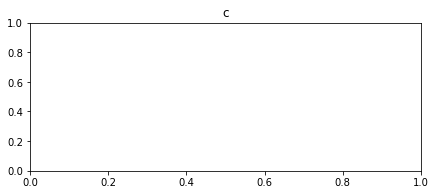

In [8]:
#plot di c e c_r
plt.figure(figsize=(7, 6))
plt.subplot(211)
plt.title('c') 
plt.plot(range(1,Nsamples1+1), c_chain1)

plt.subplot(212)
plt.title('c_r') 
plt.plot(range(1,Nsamples1+1), cr_chain1)
plt.show()

In [ ]:
#così è molto più smart e non ho problemi per gli altri parametri
normal_az1 = az.from_cmdstanpy(catena1)

In [ ]:
# parameters NON-rural f(t)
az.plot_trace(normal_az1, var_names=["a", "b", "c"], compact=False)
plt.show()

In [ ]:
# parameters rural f(t)
az.plot_trace(normal_az1, var_names=["a_r", "b_r", "c_r"], compact=False)
plt.show()

In [ ]:
# parameters wi
az.plot_trace(normal_az1, var_names=["w"], compact=False)
plt.show()

In [ ]:
# parameters: beta and sigma
az.plot_trace(normal_az, var_names=["beta", "sigma"], compact=False)
plt.show()

In [ ]:
# transformed parameters: sigma^2
az.plot_trace(normal_az, var_names=["sigma_sq"])
plt.show()